In [21]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

In [22]:
def plt_data_t(title, number_of_points):
    plt.title(title, fontsize=10)
    plt.draw()
    pts = np.asarray(plt.ginput(number_of_points, timeout=-1))
    return pts

In [23]:
def populate_data():
    positive, negative = get_data(10)
    X = list()
    Y = list()
    for i in range(len(positive)):
        data = [positive[i][0], positive[i][1], 1]
        X.append(np.array(data))
        Y.append(1)
    for i in range(len(negative)):
        data = [negative[i][0], negative[i][1], 1]
        X.append(np.array(data))
        Y.append(-1)
    return positive, negative, X, Y

In [24]:
def get_data(number_of_points):
    plt.clf()
    plt.setp(plt.gca(), autoscale_on=False)
    positive = plt_data_t("Positive Class", number_of_points)
    negative = plt_data_t("Negative Class", number_of_points)

    plt.title("DATA", fontsize=10)
    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")

    plt.draw()
    return positive, negative

#### Get Positive and Negative Data Points, This block of code will load a Interactive GUI which will wait for user to provide input

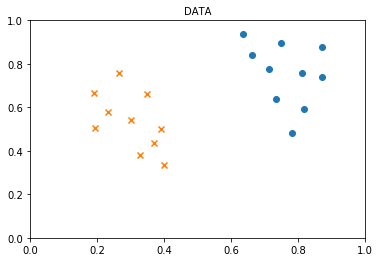

In [25]:
positive, negative, X, Y = populate_data()

$$w^T * x =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$

In [32]:
def decision_rule(w, x):
    return np.dot(w, x)

$$\text{if }y * w^T * x <= 0 \text{ then }\vec{w}  = \vec{w}  + y * \vec{x}$$

In [27]:
def update(w, x, y):
    w += y * x
    return w

In [28]:
def train(w):
    step = 0
    while True:
        miss_classified = 0
        for iterator in range(len(X)):
            x = X[iterator]
            y = Y[iterator]
            if decision_rule(w, x) * y <= 0:
                # Miss classified the data point and adjust the weight
                w_prev = w
                w = update(w, x, y)
                miss_classified = miss_classified + 1
                print(
                    "Adjusting Weight from w: {} to w_new: {}".format(
                        tuple(w_prev), tuple(w)
                    )
                )        
    #     plt_decision_boundary()
        step += 1
        if miss_classified == 0:
            # if no miss classified then the perceptron has converged and found a hyperplane
            print("Perceptron Converged on Step : {}".format(step))
            break
    return w

In [29]:
W = train(np.array([0.0, 0.0, 0.0]))

Adjusting Weight from w: (0.6362007168458781, 0.9381898454746136, 1.0) to w_new: (0.6362007168458781, 0.9381898454746136, 1.0)
Adjusting Weight from w: (0.37037037037037035, 0.17935982339955836, 0.0) to w_new: (0.37037037037037035, 0.17935982339955836, 0.0)
Adjusting Weight from w: (0.020908004778972478, -0.48289183222958076, -1.0) to w_new: (0.020908004778972478, -0.48289183222958076, -1.0)
Adjusting Weight from w: (0.6571087216248506, 0.45529801324503283, 0.0) to w_new: (0.6571087216248506, 0.45529801324503283, 0.0)
Adjusting Weight from w: (0.3912783751493428, -0.3035320088300224, -1.0) to w_new: (0.3912783751493428, -0.3035320088300224, -1.0)
Adjusting Weight from w: (1.0274790919952208, 0.6346578366445912, 0.0) to w_new: (1.0274790919952208, 0.6346578366445912, 0.0)
Adjusting Weight from w: (0.7616487455197131, -0.12417218543046404, -1.0) to w_new: (0.7616487455197131, -0.12417218543046404, -1.0)
Adjusting Weight from w: (1.397849462365591, 0.8140176600441495, 0.0) to w_new: (1.39

In [30]:
def slope_intercept():
    a, b, c = tuple(W)
    return -a / b, -c / b

def plt_decision_boundary():
    slope, intercept = slope_intercept()

    x = np.linspace(0, 1)
    y = slope * x + intercept

    plt.plot(x, y, "-r", label="decision boundary")

    plt.scatter(positive[:, 0], positive[:, 1], marker="o")
    plt.scatter(negative[:, 0], negative[:, 1], marker="x")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")
    plt.axis([0.0, 1, 0, 1])


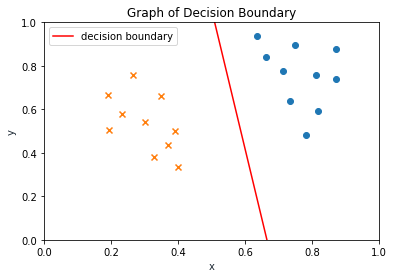

In [31]:
plt_decision_boundary()